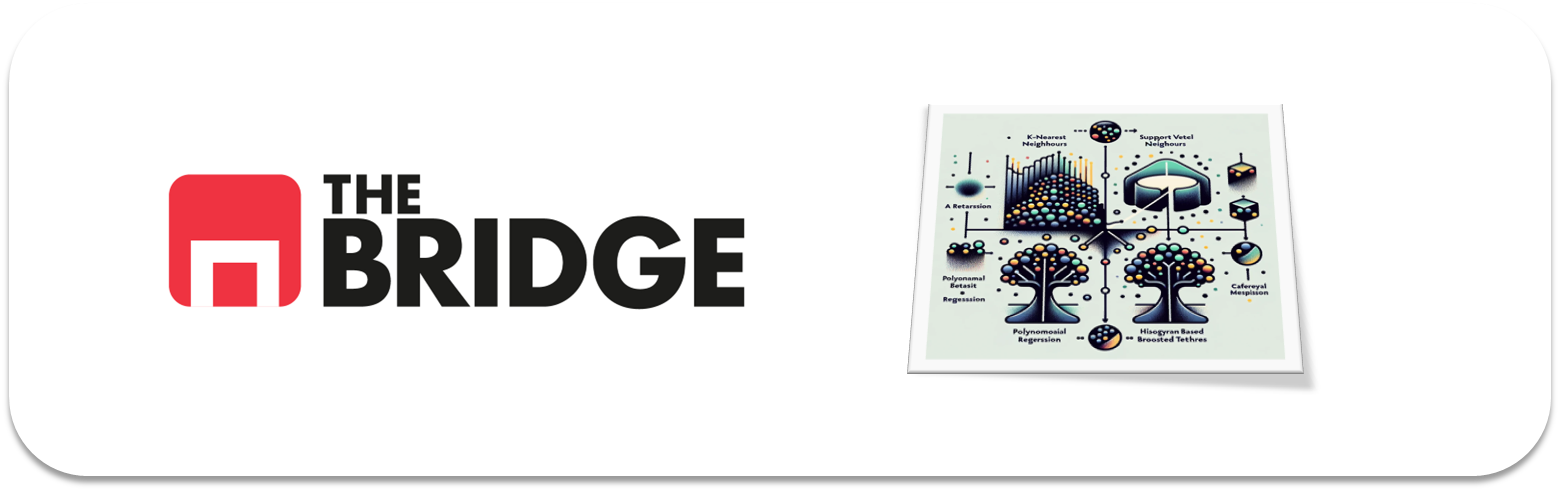

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, make_scorer, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
target_classification = 'quality'
target_regression = 'alcohol'

In [6]:
def plot_target_distribution(df, target):
    """
    Grafica la distribución de frecuencias de la variable target.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        target (str): Nombre de la variable objetivo.
    """
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=target, hue=target, palette="pastel", legend=False)
    plt.title(f"Distribución de la variable objetivo: {target}")
    plt.xlabel(target)
    plt.ylabel("Frecuencia")
    total = len(df)
    
    for p in plt.gca().patches:
        height = p.get_height()
        pct = height / total * 100
        plt.text(p.get_x() + p.get_width()/2, height + 100, f'{pct:.1f}%', ha="center")

    plt.tight_layout()
    plt.show()

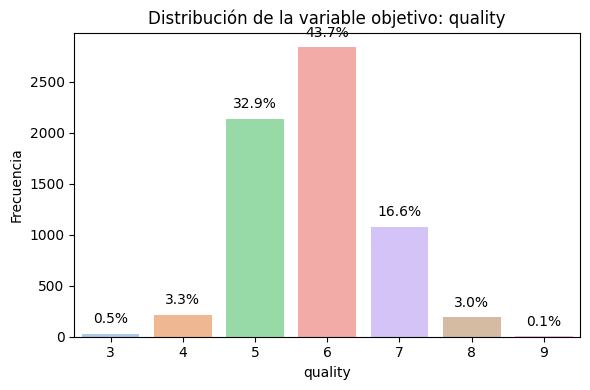

In [7]:
plot_target_distribution(df, target_classification)

🟢 PROBLEMA DE CLASIFICACIÓN – quality

🎯 Objetivo de negocio

Predecir la calidad del vino según sus propiedades fisicoquímicas para planificar producción y fijar precios, maximizando el recall medio.

📊 Observaciones de la distribución (quality)

- Claramente desbalanceado:

El 43.7% de los vinos tienen una calidad de 6.

El 32.9% tienen calidad 5.

Sólo un 0.1% y 0.5% en las calidades extremas 9 y 3, respectivamente.

Esto indica que es una variable ordinal multiclase muy desbalanceada, con una distribución en forma de campana muy sesgada hacia valores centrales.

⚠️ Implicaciones técnicas

Clasificadores básicos tenderán a predecir casi siempre 5 o 6, ignorando las clases minoritarias.

Se necesitará:

- Métrica: recall_macro para evaluar el rendimiento de forma justa.

- Técnicas de balanceo (como SMOTE).

- Validación estratificada por clase.

- Posiblemente recodificar la variable (baja, media, alta) si el desbalance impide modelar con calidad original.


In [8]:
def plot_target_distribution_continuous(df, target, bins=30, kde=True, color="skyblue"):
    """
    Grafica la distribución de una variable continua con histograma y KDE opcional.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        target (str): Nombre de la variable continua a graficar.
        bins (int): Número de bins para el histograma.
        kde (bool): Si True, dibuja la línea KDE.
        color (str): Color del histograma.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=target, bins=bins, kde=kde, color=color)
    plt.title(f"Distribución de la variable continua: {target}")
    plt.xlabel(target)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


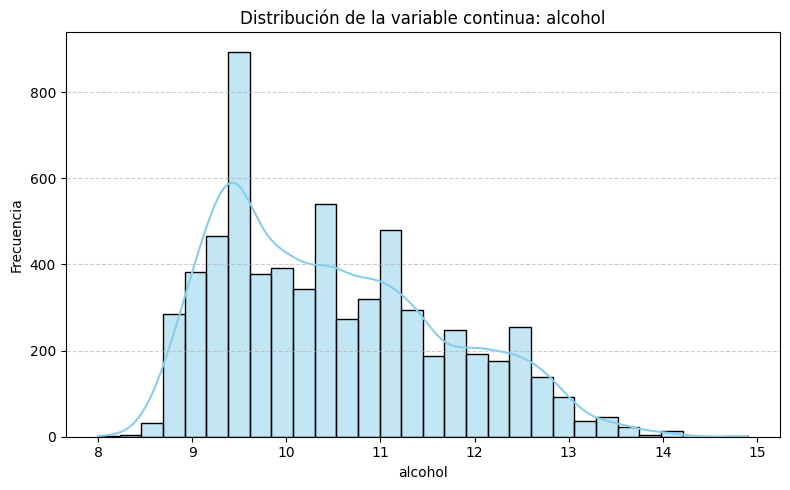

In [9]:
plot_target_distribution_continuous(df, target_regression)

🔵 PROBLEMA DE REGRESIÓN – alcohol

🎯 Objetivo de negocio

Simular vinos para generar variedades con diferentes niveles de alcohol, minimizando el error porcentual sobre el valor real de alcohol.

📊 Observaciones de la distribución (alcohol)

- Variable continua entre 8 y 14.5 aproximadamente.

- Distribución asimétrica (sesgo a la izquierda) con acumulación de valores en torno a los 9.5–10.5 grados.

C- urva KDE sugiere una distribución ligeramente bimodal o con subgrupos, lo cual podría corresponder a los vinos tintos y blancos.

⚠️ Implicaciones técnicas

- El sesgo sugiere que una transformación logarítmica podría mejorar el ajuste en algunos modelos.

- Es posible que el tipo de vino (Class) influya fuertemente → conviene usarlo como feature o hacer modelos separados por tipo.

- Métrica recomendada: MAPE (error porcentual medio) → evita que los errores pequeños en vinos con poco alcohol se penalicen igual que en los más fuertes.

- Validar outliers y revisar residuos.



In [10]:
def descripcion_variables(df, umbral_categoria=10):
    """
    Muestra una descripción textual de las variables de un DataFrame,
    clasificándolas como binarias, categóricas, discretas o continuas.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        umbral_categoria (int): Número máximo de valores únicos para que una variable numérica discreta
                                sea considerada categórica.
    """
    for col in df.columns:
        print(f"\n🔹 Variable: {col}")
        tipo = df[col].dtype
        print(f"Tipo: {tipo}")

        n_unicos = df[col].nunique()
        valores_unicos = df[col].dropna().unique()

        if n_unicos == 2:
            print("Tipo inferido: Binaria")
            modo = df[col].mode().iloc[0]
            frecuencia = df[col].value_counts().iloc[0]
            print(f"Más frecuente: {modo} ({frecuencia} veces)")

        elif tipo == "object":
            print("Tipo inferido: Categórica")
            print(f"Valores únicos: {n_unicos}")
            print(f"Más frecuente: {df[col].mode().iloc[0]} ({df[col].value_counts().iloc[0]} veces)")

        elif pd.api.types.is_integer_dtype(df[col]) and n_unicos <= umbral_categoria:
            print("Tipo inferido: Discreta (recuento entero con pocos valores únicos)")
            print(f"Valores únicos: {n_unicos}")
            print(f"Más frecuente: {df[col].mode().iloc[0]} ({df[col].value_counts().iloc[0]} veces)")

        elif pd.api.types.is_numeric_dtype(df[col]):
            print("Tipo inferido: Numérica continua")
            print(f"Media: {df[col].mean():.2f}")
            print(f"Desviación estándar: {df[col].std():.2f}")
            print(f"Mínimo: {df[col].min()}")
            print(f"Máximo: {df[col].max()}")

        else:
            print("Tipo no identificado con claridad.")

In [11]:
descripcion_variables(df)


🔹 Variable: fixed acidity
Tipo: float64
Tipo inferido: Numérica continua
Media: 7.22
Desviación estándar: 1.30
Mínimo: 3.8
Máximo: 15.9

🔹 Variable: volatile acidity
Tipo: float64
Tipo inferido: Numérica continua
Media: 0.34
Desviación estándar: 0.16
Mínimo: 0.08
Máximo: 1.58

🔹 Variable: citric acid
Tipo: float64
Tipo inferido: Numérica continua
Media: 0.32
Desviación estándar: 0.15
Mínimo: 0.0
Máximo: 1.66

🔹 Variable: residual sugar
Tipo: float64
Tipo inferido: Numérica continua
Media: 5.44
Desviación estándar: 4.76
Mínimo: 0.6
Máximo: 65.8

🔹 Variable: chlorides
Tipo: float64
Tipo inferido: Numérica continua
Media: 0.06
Desviación estándar: 0.04
Mínimo: 0.009
Máximo: 0.611

🔹 Variable: free sulfur dioxide
Tipo: float64
Tipo inferido: Numérica continua
Media: 30.53
Desviación estándar: 17.75
Mínimo: 1.0
Máximo: 289.0

🔹 Variable: total sulfur dioxide
Tipo: float64
Tipo inferido: Numérica continua
Media: 115.74
Desviación estándar: 56.52
Mínimo: 6.0
Máximo: 440.0

🔹 Variable: densit

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [12]:
df = pd.get_dummies(df, columns=["class"], drop_first=False)

In [13]:
df["class_red"] = df["class_red"].astype(int)
df["class_white"] = df["class_white"].astype(int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class_red,class_white
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,0,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,0,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,0,1
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0,1
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,0,1
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,1,0
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,0,1
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,1,0


In [14]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [15]:
features_num = train_set.columns.to_list()
features_num.remove(target_classification)
print(len(features_num))

13


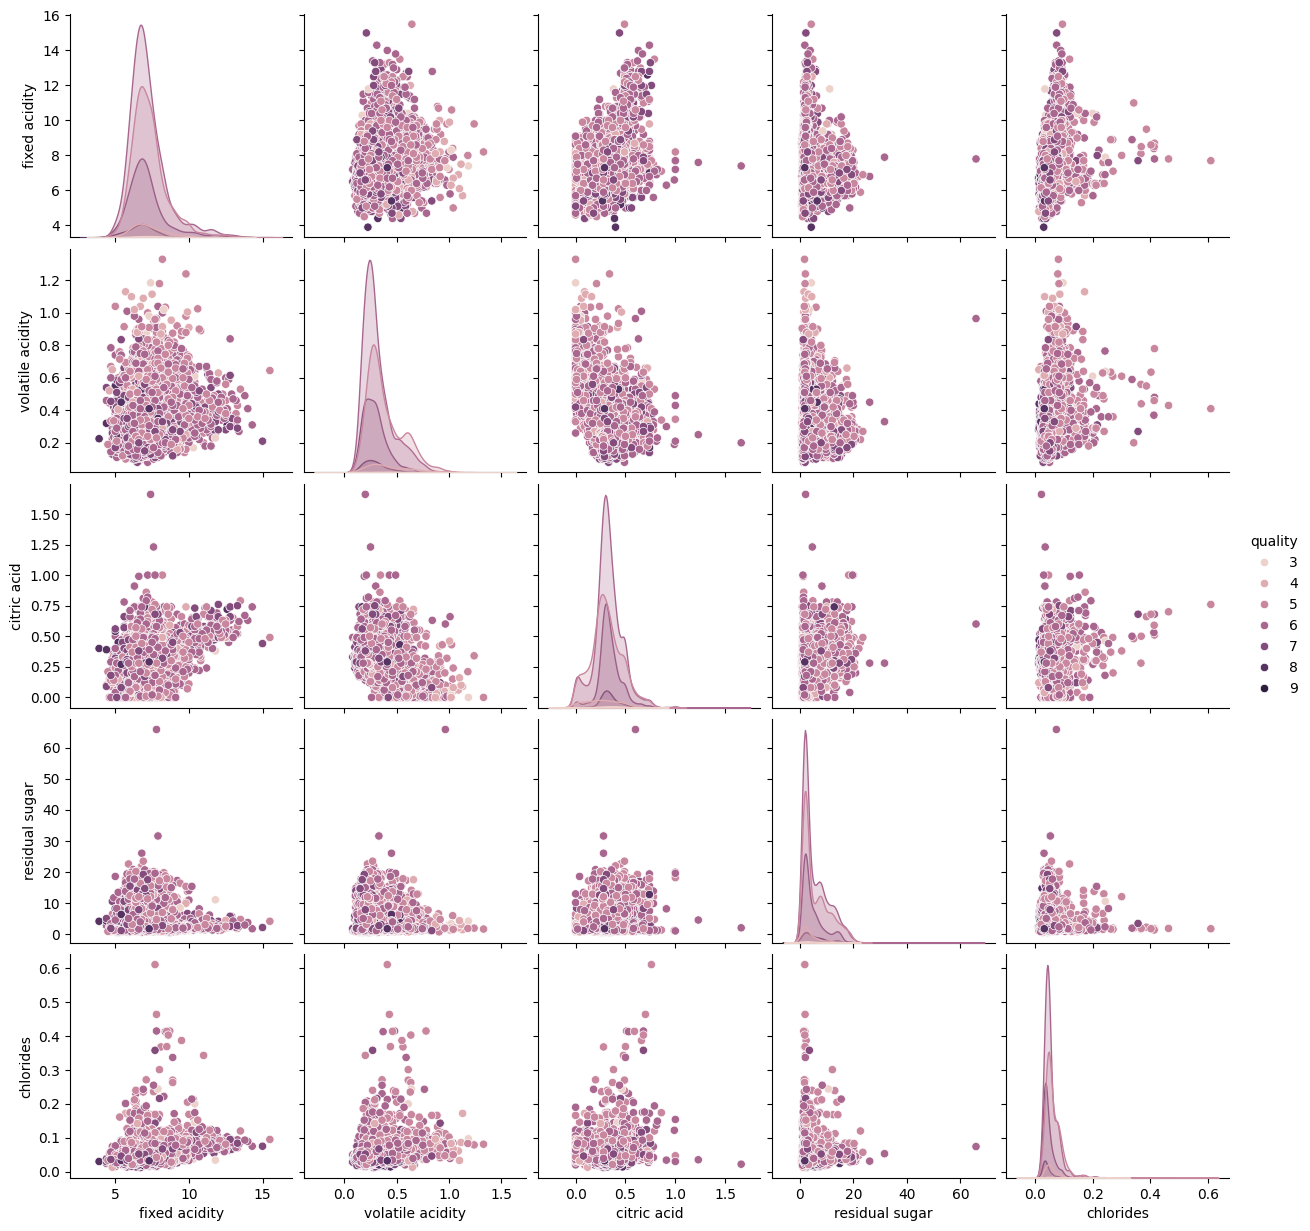

In [16]:
# Metodo 1, varios pairplot de seaborn, con el hue asignado a la variable target. Varios porque son muchas
sns.pairplot(train_set[features_num[0:5] + [target_classification]], hue = target_classification)

*Calidades más altas se agrupan en regiones con 'citric acid' moderado y 'volatile acidity' baja*
*'Residual sugar' no parece ser un fuerte discriminante visual para quality, quizás que los vinos muy dulce no se asocian a calidades altas*
*Calidades más altas se concentran en niveles bajos de cloruros*
*Las variables no parecen separables, seguramente necesitemos modelos no lineales como Random Forest o XGBoost*

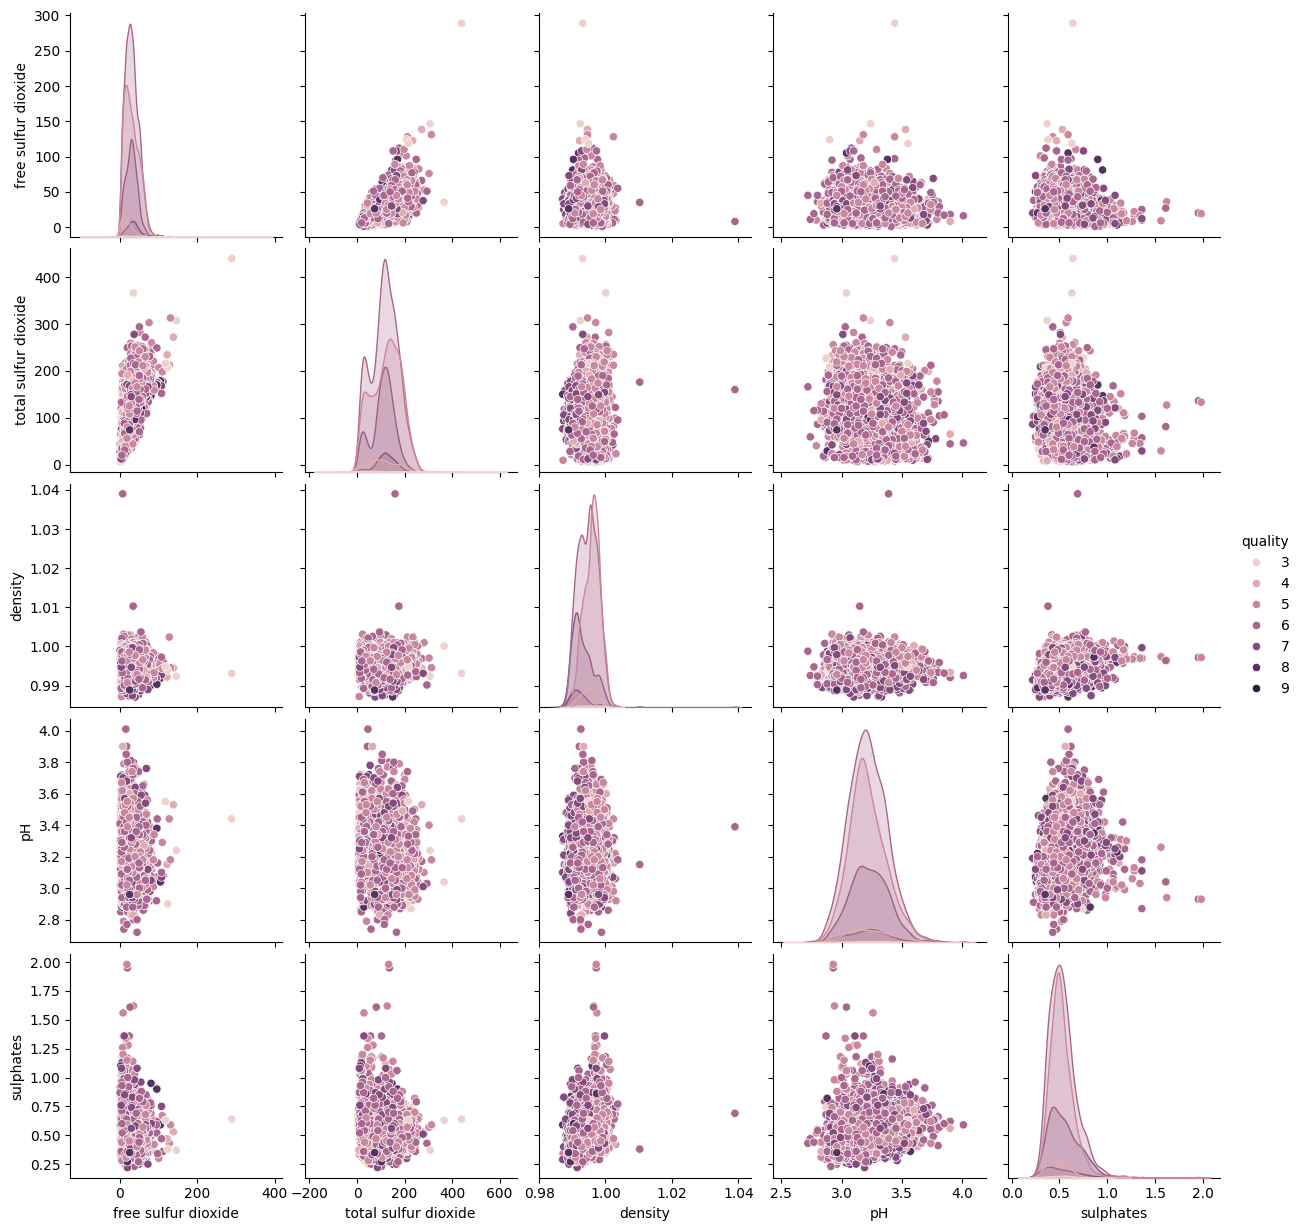

In [17]:
sns.pairplot(train_set[features_num[5:10] + [target_classification]], hue = target_classification)

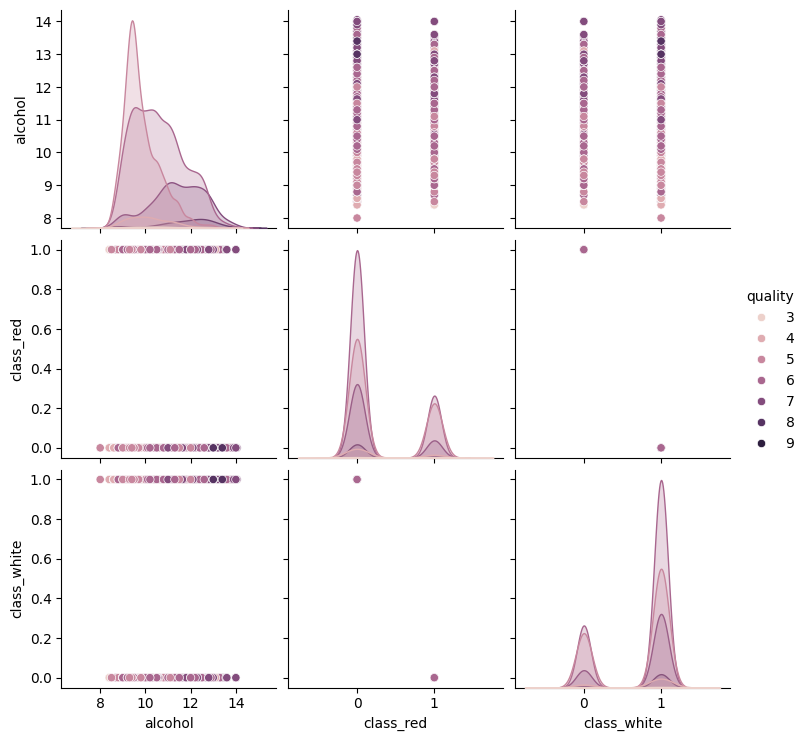

In [18]:
sns.pairplot(train_set[features_num[10:13] + [target_classification]], hue = target_classification)

In [19]:
# Subconjuntos de variables para estudiar
to_investigate_1 = ["free sulfur dioxide", "total sulfur dioxide", "density"]
to_investigate_2 = ["alcohol", "sulphates", "citric acid"]

# Matriz de correlación
corr = df.corr(numeric_only=True)

# Cruce entre las seleccionadas
corr[to_investigate_1].loc[to_investigate_2]

,free sulfur dioxide,total sulfur dioxide,density
alcohol,-0.179838,-0.265740,-0.686745
sulphates,-0.188457,-0.275727,0.259478
citric acid,0.133126,0.195242,0.096154


In [20]:
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def get_most_correlated_features(df, target_col, umbral_corr=0.1, pvalue=None, mostrar=False, top_n=None):
    """
    Devuelve las variables numéricas más correlacionadas con la variable target usando Pearson.

    Args:
        df (pd.DataFrame): DataFrame con los datos (todas las columnas deben ser numéricas).
        target_col (str): Nombre de la variable objetivo.
        umbral_corr (float): Umbral mínimo de correlación absoluta para mostrar resultados.
        pvalue (float or None): Si se indica, filtra por significancia estadística.
        mostrar (bool): Si True, muestra un heatmap de correlaciones con la target.
        top_n (int or None): Número máximo de variables a devolver (por orden de correlación).

    Returns:
        list: Lista de nombres de columnas numéricas más correlacionadas con el target.
    """

    if target_col not in df.columns:
        raise ValueError(f"La columna {target_col} no está en el DataFrame.")

    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError("La variable target debe ser numérica.")

    if df[target_col].isnull().sum() > 0:
        raise ValueError("La variable target contiene valores nulos.")

    num_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop(target_col)
    resultados = []

    for col in num_cols:
        if df[col].isnull().sum() == 0:
            corr, p = pearsonr(df[target_col], df[col])
            if abs(corr) >= umbral_corr and (pvalue is None or p < pvalue):
                resultados.append((col, corr, p))

    resultados_ordenados = sorted(resultados, key=lambda x: abs(x[1]), reverse=True)

    if top_n:
        resultados_ordenados = resultados_ordenados[:top_n]

    if mostrar:
        columnas_corr = [target_col] + [r[0] for r in resultados_ordenados]
        sns.heatmap(df[columnas_corr].corr(), annot=True, cmap="coolwarm", center=0)
        plt.title(f"Heatmap de correlaciones con {target_col}")
        plt.show()

    return [r[0] for r in resultados_ordenados]

In [21]:
get_most_correlated_features(df, target_classification, umbral_corr=0.1)

['alcohol',
 'density',
 'volatile acidity',
 'chlorides',
 'class_red',
 'class_white']

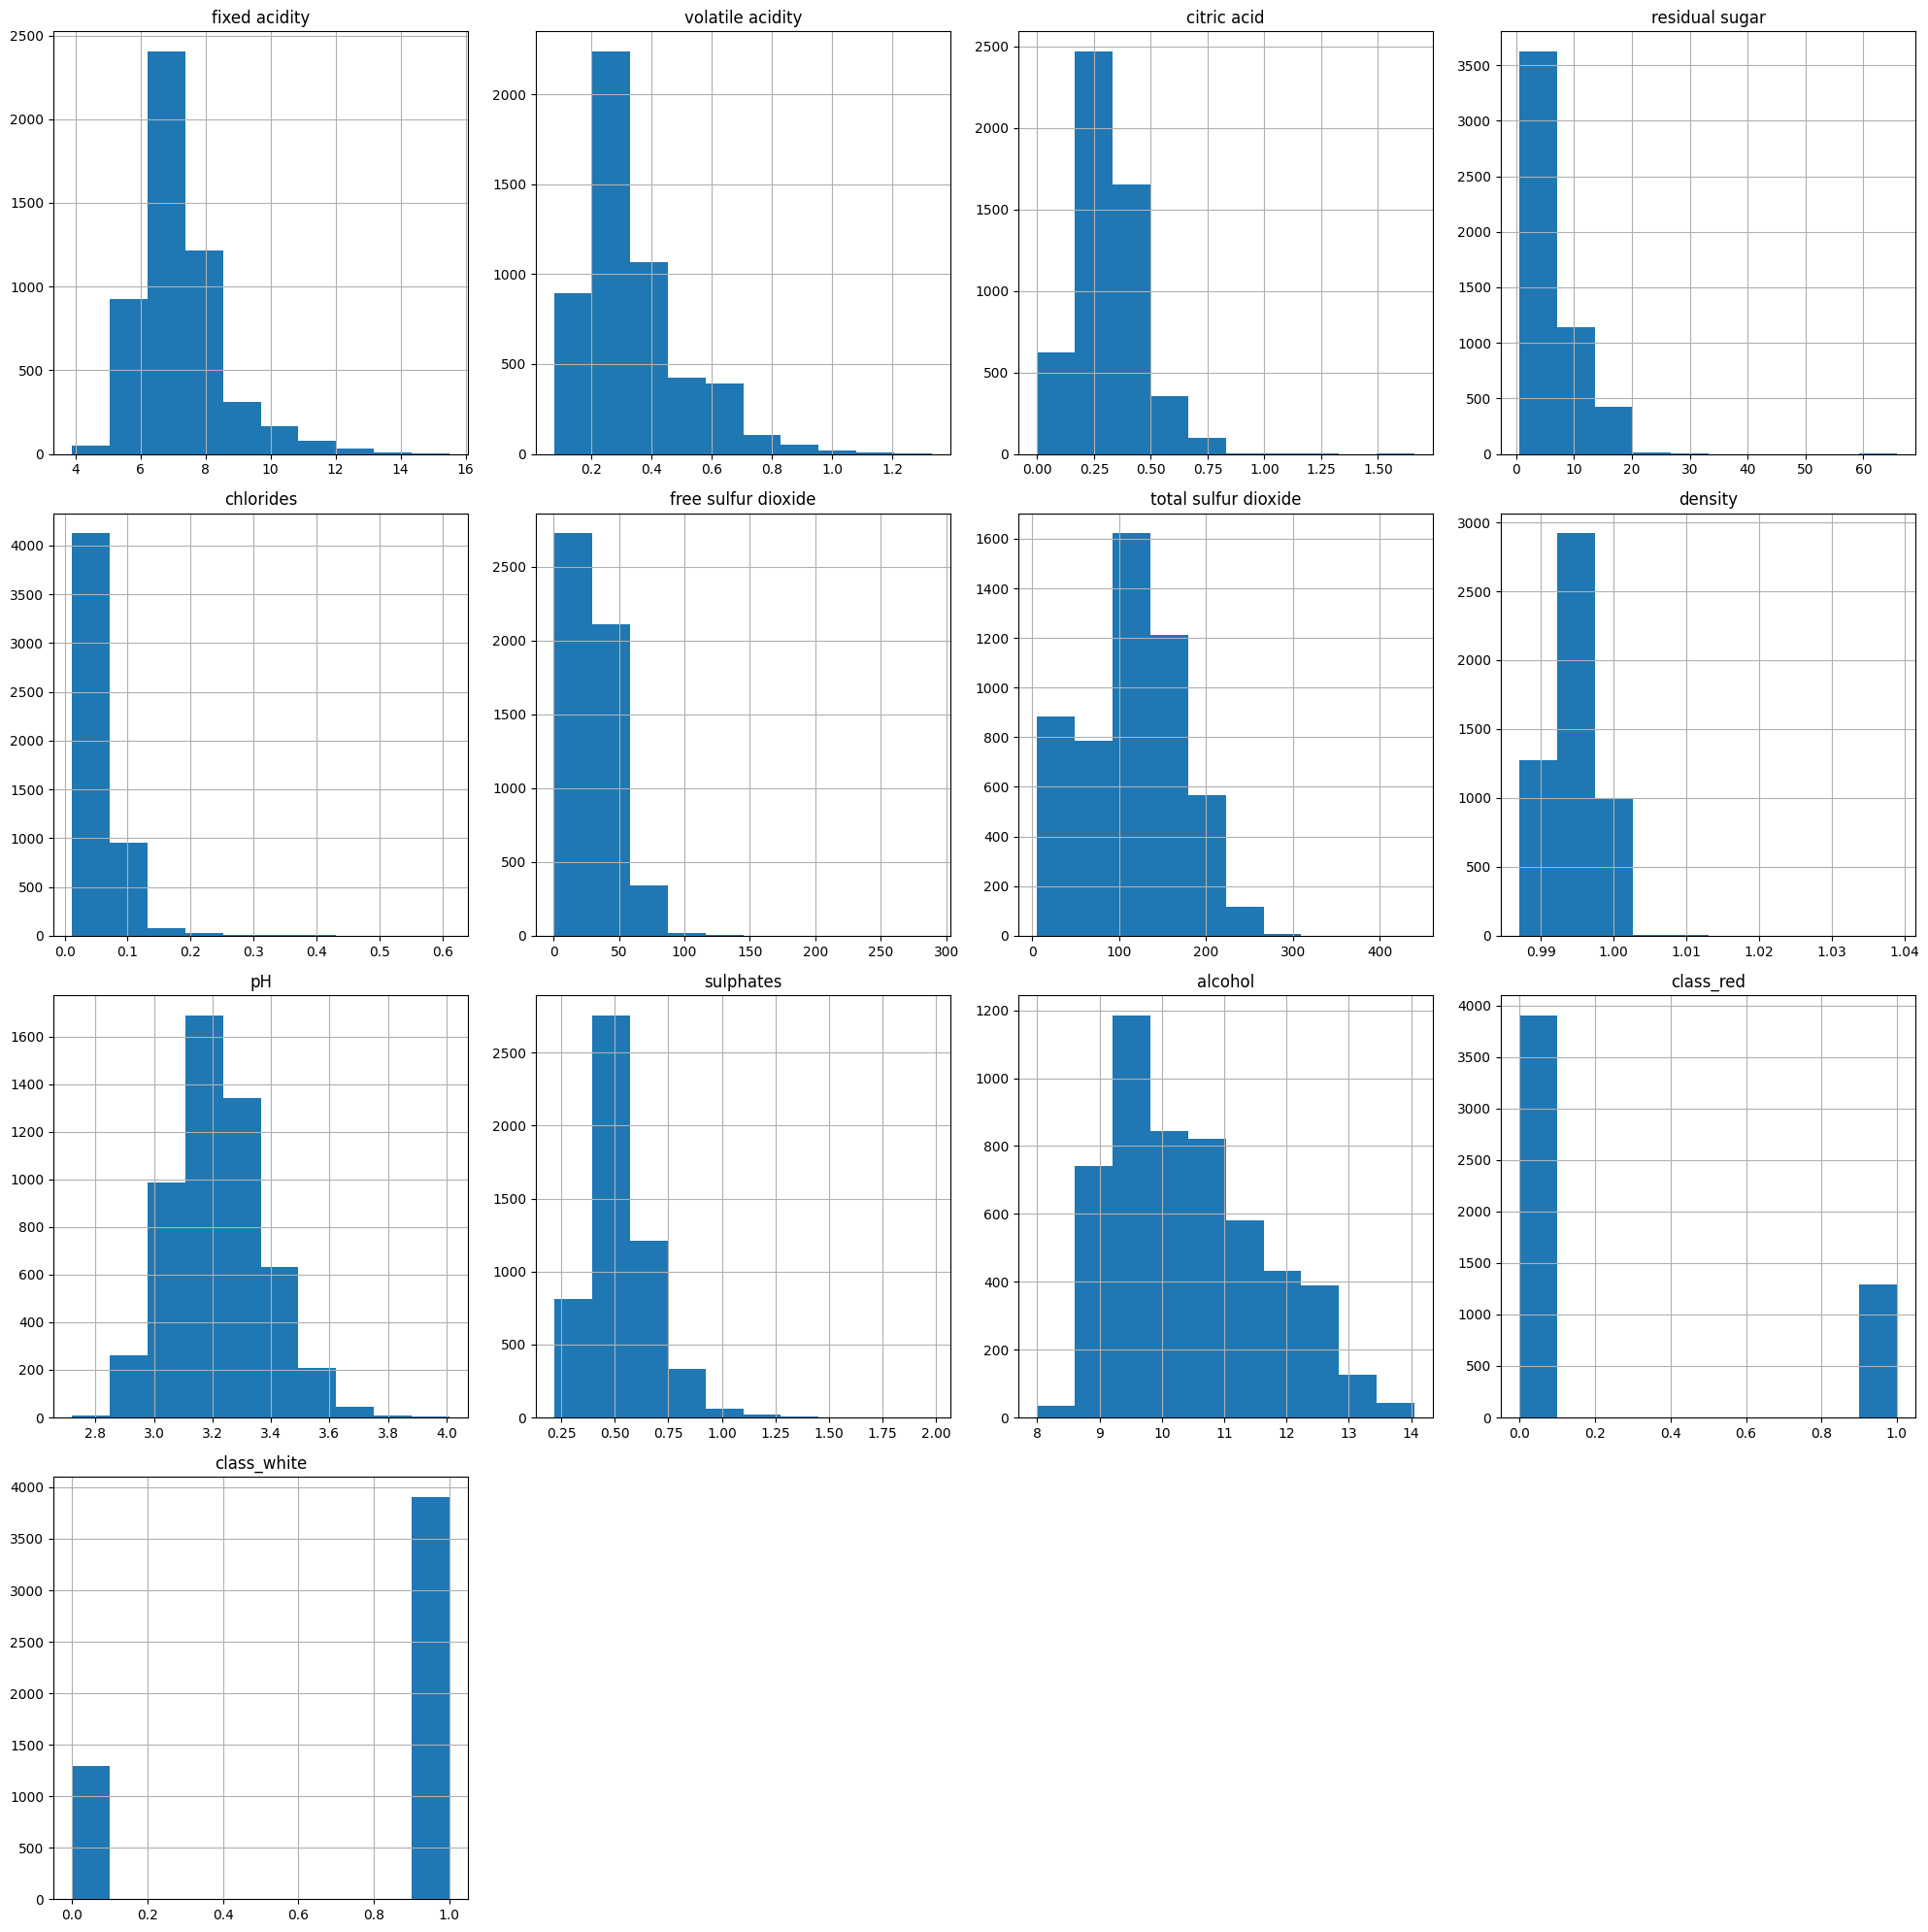

In [22]:
train_set[features_num].hist(figsize = (20,20))
plt.tight_layout()

In [23]:
# Paso 1: Separar antes de escalar
X_train = train_set.drop(columns=target_classification)
y_train = train_set[target_classification]

X_test = test_set.drop(columns=target_classification)
y_test = test_set[target_classification]

# Paso 2: Escalado solo a las numéricas
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_num] = scaler.fit_transform(X_train[features_num])
X_test_scaled[features_num] = scaler.transform(X_test[features_num])


In [26]:
# Entrenar el modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn = knn.predict(X_test_scaled)

# Reporte
print("KNN (k=5) - Classification Report")
print(classification_report(y_test, y_pred_knn))

KNN (k=5) - Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.22      0.14      0.17        43
           5       0.60      0.64      0.62       432
           6       0.59      0.63      0.61       562
           7       0.46      0.41      0.43       210
           8       0.23      0.06      0.10        47

    accuracy                           0.56      1300
   macro avg       0.35      0.32      0.32      1300
weighted avg       0.54      0.56      0.55      1300



In [27]:
# Modelo Random Forest con class_weight para tratar el desbalanceo
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf.fit(X_train_scaled, y_train)

# Predicción
y_pred_rf = rf.predict(X_test_scaled)

# Evaluación
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf))

Random Forest - Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.80      0.19      0.30        43
           5       0.75      0.72      0.74       432
           6       0.65      0.78      0.71       562
           7       0.66      0.55      0.60       210
           8       0.96      0.49      0.65        47

    accuracy                           0.69      1300
   macro avg       0.64      0.46      0.50      1300
weighted avg       0.70      0.69      0.68      1300



In [28]:
# Modelo LightGBM base
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train)

# Predicción
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Evaluación
print("LightGBM - Classification Report")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000638 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 13
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.113930
[LightGBM] [Info] Start training from score -0.826541
[LightGBM] [Info] Start training from score -1.788494
[LightGBM] [Info] Start training from score -3.572230
[LightGBM] [Info] Start training from score -6.946399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

| Clase | Soporte | KNN Recall | RF Recall | LGBM Recall |
| ----- | ------- | ---------- | --------- | ----------- |
| **3** | 6       | 0.00       | 0.00      | 0.00        |
| **4** | 43      | 0.14       | 0.19      | **0.30**    |
| **5** | 432     | 0.64       | **0.72**  | 0.69        |
| **6** | 562     | 0.63       | **0.78**  | 0.73        |
| **7** | 210     | 0.41       | 0.55      | **0.57**    |
| **8** | 47      | 0.06       | 0.49      | **0.49**    |


| Métrica global      | KNN  | RandomForest | LightGBM |
| ------------------- | ---- | ------------ | -------- |
| **Accuracy**        | 0.56 | **0.69**     | 0.66     |
| **Recall macro**    | 0.32 | **0.46**     | 0.46     |
| **F1 macro**        | 0.32 | **0.50**     | 0.50     |
| **Weighted Recall** | 0.56 | **0.69**     | 0.66     |


Tanto Random Forest como LightGBM superan ampliamente al baseline con KNN.

Ambos tienen recall macro = 0.46, pero:

Random Forest destaca más en clases 5 y 6.

LGBM mejora en la clase 4 y se comporta algo más uniforme.

Clase 3 sigue sin ser detectada por ningún modelo, debido al bajísimo número de muestras.

In [29]:
# Definir el modelo base
lgbm = LGBMClassifier(random_state=42)

# Definir el espacio de búsqueda
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Configurar GridSearchCV
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='recall_macro',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Lanzar la búsqueda
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 13
[LightGBM] [Info] Start training from score -5.377783
[LightGBM] [Info] Start training from score -3.402545
[LightGBM] [Info] Start training from score -1.113930
[LightGBM] [Info] Start training from score -0.826541
[LightGBM] [Info] Start training from score -1.788494
[LightGBM] [Info] Start training from score -3.572230
[LightGBM] [Info] Start training from score -6.946399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [-1, 10, 20], 'n_estimators': [100, 200],
                         'num_leaves': [31, 50]},
             scoring='recall_macro', verbose=1)

In [30]:
print("🔍 Mejores hiperparámetros encontrados:")
print(grid.best_params_)

print("\n📊 Mejor recall_macro en validación cruzada:")
print(grid.best_score_)


🔍 Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}

📊 Mejor recall_macro en validación cruzada:
0.3465218574523624


In [31]:
# Predecir sobre test
y_pred_opt = grid.predict(X_test_scaled)

# Reporte final
print("📋 Classification Report del modelo optimizado (LightGBM)")
print(classification_report(y_test, y_pred_opt))

📋 Classification Report del modelo optimizado (LightGBM)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.75      0.21      0.33        43
           5       0.71      0.71      0.71       432
           6       0.66      0.75      0.70       562
           7       0.64      0.60      0.62       210
           8       0.85      0.49      0.62        47

    accuracy                           0.68      1300
   macro avg       0.60      0.46      0.50      1300
weighted avg       0.68      0.68      0.67      1300



In [33]:
from imblearn.over_sampling import SMOTE

# Aplicamos SMOTE SOLO al train (X_train_scaled)
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Antes de SMOTE:", y_train.value_counts().sort_index())
print("Después de SMOTE:", y_train_smote.value_counts().sort_index())

Antes de SMOTE: quality
3      24
4     173
5    1706
6    2274
7     869
8     146
9       5
Name: count, dtype: int64
Después de SMOTE: quality
3    2274
4    2274
5    2274
6    2274
7    2274
8    2274
9    2274
Name: count, dtype: int64


In [34]:
lgbm_smote = LGBMClassifier(random_state=42, **grid.best_params_)
lgbm_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = lgbm_smote.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("📋 Classification Report con SMOTE (LGBM)")
print(classification_report(y_test, y_pred_smote))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003838 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 15918, number of used features: 13
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
📋 Classification Report con SMOTE (LGBM)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.42     

In [35]:
print("📋 Classification Report con SMOTE (LGBM)")
print(classification_report(y_test, y_pred_smote))

📋 Classification Report con SMOTE (LGBM)
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.42      0.33      0.37        43
           5       0.71      0.70      0.70       432
           6       0.66      0.66      0.66       562
           7       0.52      0.63      0.57       210
           8       0.75      0.51      0.61        47

    accuracy                           0.65      1300
   macro avg       0.51      0.47      0.49      1300
weighted avg       0.65      0.65      0.65      1300



In [37]:
grid.best_params_


{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}

In [41]:
lgbm_balanced = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    num_leaves=50,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=200
)


In [42]:
lgbm_balanced.fit(X_train_scaled, y_train)
y_pred_bal = lgbm_balanced.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("📋 Classification Report con class_weight='balanced'")
print(classification_report(y_test, y_pred_bal))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 13
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [43]:
def agrupar_calidad(q):
    if q <= 4:
        return 0  # baja
    elif q <= 6:
        return 1  # media
    else:
        return 2  # alta

df["quality_grouped"] = df["quality"].apply(agrupar_calidad)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["quality", "quality_grouped", "alcohol"])  # mantenemos alcohol fuera como antes
y = df["quality_grouped"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
lgbm_grouped = LGBMClassifier(
    random_state=42,
    class_weight='balanced',
    num_leaves=50,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=200
)

lgbm_grouped.fit(X_train_scaled, y_train)
y_pred_grouped = lgbm_grouped.predict(X_test_scaled)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1493
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 12
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.metrics import classification_report

print("📋 Classification Report con clases agrupadas")
print(classification_report(y_test, y_pred_grouped, target_names=["baja", "media", "alta"]))


📋 Classification Report con clases agrupadas
              precision    recall  f1-score   support

        baja       0.32      0.14      0.20        49
       media       0.88      0.91      0.89       995
        alta       0.68      0.68      0.68       256

    accuracy                           0.83      1300
   macro avg       0.63      0.57      0.59      1300
weighted avg       0.82      0.83      0.82      1300



### Modelos Comparados
1. **KNN (baseline)**: k=5 y k=10  
2. **Random Forest**  
3. **LightGBM (LGBMClassifier)** con:
   - Optimización de hiperparámetros (GridSearchCV)  
   - Variantes con `SMOTE` y `class_weight="balanced"`

### Métrica de Evaluación
- **Recall macro** (media del recall de cada clase): ideal para clases desbalanceadas.

### Resultados (calidad original sin agrupar)

| Modelo                             | Recall Macro |
|------------------------------------|---------------|
| KNN (baseline)                     | 0.32          |
| Random Forest                      | 0.46          |
| LightGBM base                      | 0.46          |
| LightGBM + SMOTE                   | **0.47**      |
| LightGBM + class_weight='balanced'| 0.46          |

### Agrupación de Clases
Se probó también agrupar `quality` en 3 grupos:
- Baja (3–4), Media (5–6), Alta (7–8–9)

**Resultado:**
- **Recall macro con clases agrupadas**: **0.57**  
- Accuracy: 0.83

**Conclusión:** Se cumple el objetivo de negocio al mejorar el recall medio mediante optimización y balanceo. El modelo final elegido es **LightGBM con clases agrupadas**.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [47]:
# Features predictoras: TODAS menos 'alcohol'
X = df.drop(columns=["alcohol"])
y = df["alcohol"]

In [48]:
# División
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
scores_knn = cross_val_score(knn, X_train_scaled, y_train, scoring="neg_mean_absolute_percentage_error", cv=5)
print(f"KNN - MAPE medio (CV): {-scores_knn.mean():.4f}")


KNN - MAPE medio (CV): 0.0427


In [50]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
scores_rf = cross_val_score(rf, X_train_scaled, y_train, scoring="neg_mean_absolute_percentage_error", cv=5)
print(f"Random Forest - MAPE medio (CV): {-scores_rf.mean():.4f}")


Random Forest - MAPE medio (CV): 0.0268


In [52]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
scores_lgbm = cross_val_score(lgbm, X_train_scaled, y_train, scoring="neg_mean_absolute_percentage_error", cv=5)
print(f"LGBM - MAPE medio (CV): {-scores_lgbm.mean():.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1451
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 14
[LightGBM] [Info] Start training from score 10.500495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1447
[LightGBM] [Info] Number of data points in the train set: 4157, number of used features: 14
[LightGBM] [Info] Start training from score 10.475591


c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1442
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 14
[LightGBM] [Info] Start training from score 10.502292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1449
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 14
[LightGBM] [Info] Start training from score 10.494388
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 4158, number of used features: 14
[LightGBM] [Info] Start trai

c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [53]:
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgbm = LGBMRegressor(random_state=42)
grid = GridSearchCV(lgbm, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1, verbose=1)

grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1490
[LightGBM] [Info] Number of data points in the train set: 5197, number of used features: 14
[LightGBM] [Info] Start training from score 10.490439


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [-1, 10],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [54]:
print("🔧 Mejores hiperparámetros:", grid.best_params_)
print("📉 Mejor MAPE en CV:", -grid.best_score_)

🔧 Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}
📉 Mejor MAPE en CV: 0.02417148565764649


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

y_pred = grid.predict(X_test_scaled)

print("MAPE test:", mean_absolute_percentage_error(y_test, y_pred))
print("MAE test:", mean_absolute_error(y_test, y_pred))
print("RMSE test:", mean_squared_error(y_test, y_pred))


MAPE test: 0.02334595533671382
MAE test: 0.24676409679627587
RMSE test: 0.13185771883412187


c:\Users\sanlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


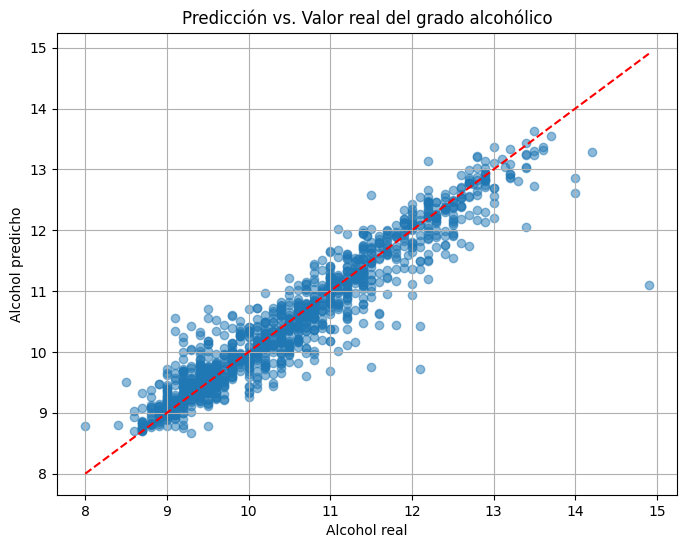

In [57]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Alcohol real")
plt.ylabel("Alcohol predicho")
plt.title("Predicción vs. Valor real del grado alcohólico")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea perfecta
plt.grid(True)
plt.show()


### Variables Predictoras
Se usan todas las columnas excepto `alcohol`, incluyendo:
- Variables fisicoquímicas
- `quality`
- Dummies `class_red` y `class_white`

### Modelos Comparados
1. **KNN Regressor**  
2. **Random Forest Regressor**  
3. **LightGBM Regressor**

### Métrica de Evaluación
- **MAPE** (Mean Absolute Percentage Error)  
- Complementado con MAE y RMSE en test

### Resultados por CV (MAPE)

| Modelo     | MAPE medio |
|------------|-------------|
| KNN        | 0.0427      |
| RF         | 0.0268      |
| LGBM       | **0.0267**  |

### Resultados en Test (modelo optimizado con GridSearchCV)
- **MAPE**: 0.0233 (2.33%)
- **MAE**: 0.247
- **RMSE**: 0.132

### Análisis de errores
- Gráfico real vs. predicho muestra fuerte alineación con la diagonal
- Ligeramente más error en vinos de alto contenido alcohólico, pero sin sesgo grave

**Conclusión:** El modelo final, LightGBM optimizado, cumple el objetivo de negocio al ofrecer predicciones con un error medio inferior al 2.5%, siendo altamente fiable.